In [158]:
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt
import time
import yfinance as yf

In [159]:
df = pd.read_csv("BAJFINANCE.csv")

In [160]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-17,903.500000,903.500000,860.00,871.150024,862.519653,1929384
1,2016-11-18,872.000000,901.450012,865.00,878.400024,869.697815,1647276
2,2016-11-21,891.450012,891.450012,815.50,832.200012,823.955566,2076791
3,2016-11-22,850.049988,863.000000,830.25,858.000000,849.499878,1434086
4,2016-11-23,871.000000,871.450012,844.50,850.250000,841.826782,1161595


In [161]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1229,2021-11-11,7570.200195,7600.950195,7410.00,7452.700195,7452.700195,634400
1230,2021-11-12,7500.000000,7600.250000,7453.00,7579.100098,7579.100098,497128
1231,2021-11-15,7579.000000,7627.450195,7490.00,7534.250000,7534.250000,402518
1232,2021-11-16,7525.000000,7650.000000,7500.75,7555.700195,7555.700195,598049
1233,2021-11-17,7528.000000,7692.000000,7521.25,7607.649902,7607.649902,645376


In [162]:
df= df["High"].copy()

In [163]:
df

0        903.500000
1        901.450012
2        891.450012
3        863.000000
4        871.450012
           ...     
1229    7600.950195
1230    7600.250000
1231    7627.450195
1232    7650.000000
1233    7692.000000
Name: High, Length: 1234, dtype: float64

In [164]:
df_new=df

In [165]:
df = df_new[:-100]

In [166]:
df.describe()

count    1134.000000
mean     2899.110667
std      1337.838709
min       784.799988
25%      1807.125000
50%      2653.250000
75%      3686.000000
max      6249.000000
Name: High, dtype: float64

In [167]:
n = int(len(df)*0.8)
train = df[:n]
test = df[n:]

In [168]:
print(len(train))
print(len(test))

907
227


In [169]:
from statsmodels.tsa.arima_model import ARIMA

In [206]:
model = ARIMA(df, order=(1,1,1))
result = model.fit(disp=0)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa

In [207]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.High   No. Observations:                 1133
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6386.457
Method:                       css-mle   S.D. of innovations             67.885
Date:                Wed, 17 Nov 2021   AIC                          12780.915
Time:                        22:57:12   BIC                          12801.045
Sample:                             1   HQIC                         12788.519
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.6739      2.454      1.904      0.057      -0.136       9.484
ar.L1.D.High     0.0902      0.138      0.655      0.513      -0.180       0.360
ma.L1.D.High     0.1073      0.137      0.783      0.434      -0.161       0.376
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           11.0824           +0.0000j           11.0824            0.0000
MA.1           -9.3206           +0.0000j            9.3206            0.5000
-----------------------------------------------------------------------------
"""

In [208]:
step = 100 
fc , se, conf = result.forecast(step )

In [209]:
fc

array([6203.86605309, 6209.45964438, 6214.21654917, 6218.89795682,
       6223.57255211, 6228.24653269, 6232.9204578 , 6237.59437791,
       6242.26829757, 6246.94221719, 6251.6161368 , 6256.29005641,
       6260.96397603, 6265.63789564, 6270.31181525, 6274.98573487,
       6279.65965448, 6284.33357409, 6289.0074937 , 6293.68141332,
       6298.35533293, 6303.02925254, 6307.70317215, 6312.37709177,
       6317.05101138, 6321.72493099, 6326.39885061, 6331.07277022,
       6335.74668983, 6340.42060944, 6345.09452906, 6349.76844867,
       6354.44236828, 6359.11628789, 6363.79020751, 6368.46412712,
       6373.13804673, 6377.81196635, 6382.48588596, 6387.15980557,
       6391.83372518, 6396.5076448 , 6401.18156441, 6405.85548402,
       6410.52940364, 6415.20332325, 6419.87724286, 6424.55116247,
       6429.22508209, 6433.8990017 , 6438.57292131, 6443.24684092,
       6447.92076054, 6452.59468015, 6457.26859976, 6461.94251938,
       6466.61643899, 6471.2903586 , 6475.96427821, 6480.63819

In [210]:
se

array([ 67.88475453, 105.91021217, 134.25269826, 157.63447432,
       177.97498636, 196.21852851, 212.90453107, 228.37462417,
       242.86127457, 256.53114512, 269.50854931, 281.88914112,
       293.74839168, 305.14709133, 316.13506146, 326.75374032,
       337.03803428, 347.01767431, 356.71823056, 366.16188462,
       375.36802671, 384.35372408, 393.13409283, 401.72259667,
       410.13128924, 418.37101255, 426.451561  , 434.38181777,
       442.16986933, 449.82310198, 457.34828392, 464.75163533,
       472.03888852, 479.21533991, 486.28589506, 493.2551079 ,
       500.12721502, 506.90616581, 513.595649  , 520.19911611,
       526.7198023 , 533.16074487, 539.5247998 , 545.81465658,
       552.03285144, 558.18177935, 564.26370478, 570.28077143,
       576.23501108, 582.1283516 , 587.96262421, 593.73957018,
       599.46084687, 605.12803328, 610.74263515, 616.30608964,
       621.8197696 , 627.28498754, 632.7029993 , 638.07500739,
       643.40216412, 648.68557447, 653.9262988 , 659.12

In [211]:
mse = np.mean(se)
mse

552.0030858138373

In [212]:
rmse = np.sqrt(mse)
rmse

23.494745919329226

In [213]:
from sklearn.metrics import r2_score

In [214]:
df_d=df.to_numpy()

In [215]:
r2 = r2_score(df_new[-100:], fc)

In [216]:
r2

-0.48247290908007456

In [217]:
df_new[-100:]

1134    6115.000000
1135    6108.000000
1136    6107.000000
1137    6117.700195
1138    6137.649902
           ...     
1229    7600.950195
1230    7600.250000
1231    7627.450195
1232    7650.000000
1233    7692.000000
Name: High, Length: 100, dtype: float64

In [218]:
df_d=np.concatenate((df_d,fc))

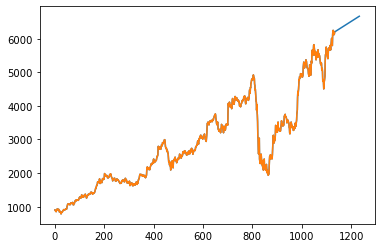

In [219]:
plt.plot(df_d)
plt.plot(df)

plt.show().s

In [220]:
import plotly.express as px

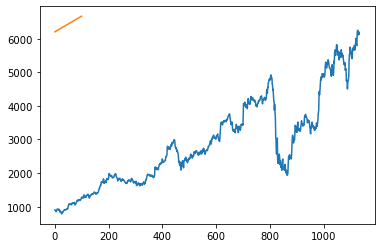

In [221]:
plt.plot(df)
plt.plot(fc)
plt.show()

In [222]:
fig = px.line(df)
fig.show()
fig = px.line(fc)
fig.show()

In [187]:
dffc= pd.DataFrame(data=fc)
dffc

,0
0,6203.866053
1,6209.459644
2,6214.216549
3,6218.897957
4,6223.572552
...,...
95,6648.899304
96,6653.573223
97,6658.247143
98,6662.921063
